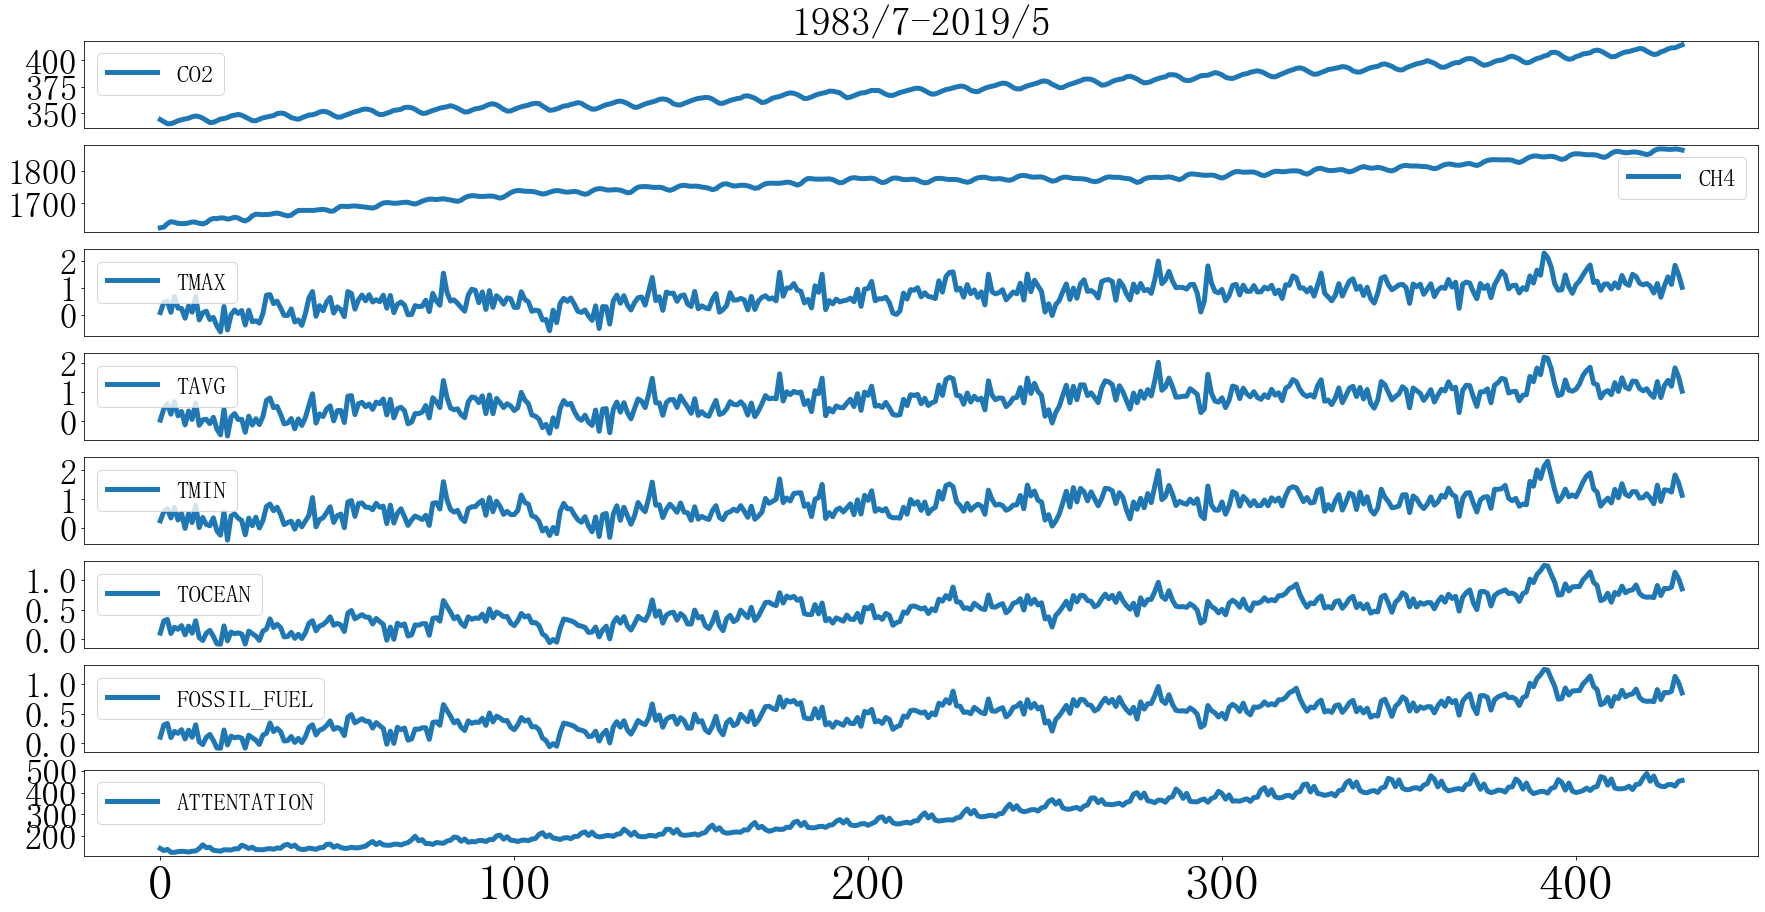

In [1]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
# load dataset
dataset = read_csv('data.csv', header=0)
# print(dataset.values[:,0])

# month=dataset.values[:,0]
month=list(map(str,dataset.values[:,0]))
# print(month)
# print(type(month[0]))
values = dataset.values

# specify columns to plot
groups = list(range(1,len(dataset.columns)))
i = 1
# plot each column

start = datetime.datetime(1983, 7, 1)
end = datetime.datetime(2019, 5, 1)
# 设置日期的间隔为1
delta = datetime.timedelta(days=30.4)
 
# 生成一个matplotlib可以识别的日期对象
dates = mpl.dates.drange(start, end, delta)
# print(dates)

fig= pyplot.figure(figsize = (30,15))
for group in groups:
    
    plt.subplot(len(groups),1,i)
    i=i+1
    
    if i==2:
        plt.title("1983/7-2019/5",fontsize=40)
    if i!=len(groups)+1:
        plt.xticks([])
    else:
        pass
        
#         pyplot.plot(month,values[:, group])
#     else:
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)

    pyplot.plot(values[:, group],linewidth=5,label=dataset.columns[group])
    plt.legend(prop={'size':25})
#     pyplot.title(dataset.columns[group], loc='center')
    
#     pyplot.xlabel("time")
#     pyplot.ylabel("value",fontsize=25)
#     pyplot.xticks(rotation=90,fontsize=4)

pyplot.savefig("truth.png",dpi=240)
#     pyplot.show()

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# 转换序列成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised(data, n_in=1, n_out=1,y_columns=[0],dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[y_columns].shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in y_columns]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 加载数据集
dataset = read_csv('data.csv', header=0)
values = dataset.values[:,1:]
feature=values.shape[1]

# print(values)
# # 整数编码
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1,2,3,4))
scaled = scaler.fit_transform(values)
# scaled=values

# 构建监督学习问题
n_in=60
reframed = series_to_supervised(scaled, n_in, 1,y_columns=list(range(feature)))
reframed.to_csv("时间序列var.csv")
print(reframed.head(5))
# 分割为训练集和测试集
values = reframed.values

n_train_hours = 300
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 分为输入输出
train_X, train_y = train[:, :-feature], train[:, -feature:]
print(-values.shape[1])
test_X, test_y = test[:, :-feature], test[:, -feature:]
# 重塑成3D形状 [样例, 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Using TensorFlow backend.


    var1(t-60)  var2(t-60)  var3(t-60)  var4(t-60)  var5(t-60)  var6(t-60)  \
60    0.051675    0.000000    0.244801    0.200890    0.243947    0.140285   
61    0.025838    0.009155    0.372656    0.344329    0.359868    0.294824   
62    0.000000    0.052018    0.389703    0.408451    0.397285    0.314329   
63    0.000404    0.078236    0.248210    0.276130    0.280264    0.135034   
64    0.016687    0.069496    0.450733    0.433655    0.413426    0.213803   

    var7(t-60)  var8(t-60)  var1(t-59)  var2(t-59)  ...  var7(t-1)  var8(t-1)  \
60    0.140285    0.048907    0.025838    0.009155  ...   0.340585   0.112756   
61    0.294824    0.022276    0.000000    0.052018  ...   0.256564   0.138092   
62    0.314329    0.037604    0.000404    0.078236  ...   0.325581   0.098861   
63    0.135034    0.001820    0.016687    0.069496  ...   0.286572   0.125713   
64    0.213803    0.000000    0.036334    0.056596  ...   0.252063   0.094726   

     var1(t)   var2(t)   var3(t)   var4(t)  

In [3]:
# 设计网络
model2 = Sequential()
model2.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model2.add(LSTM(200,return_sequences=True))
# model.add(LSTM(200,return_sequences=True))
model2.add(LSTM(100,return_sequences=False))
model2.add(Dense(100))
model2.add(Dense(feature))
model2.compile(loss='mae', optimizer='adam')
# 拟合神经网络模型
history = model2.fit(np.vstack((train_X,test_X)), np.vstack((train_y,test_y)), epochs=400, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# 绘制训练测试误差图
fig= pyplot.figure(figsize = (30,15))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(prop={'size':50})

# plt.savefig('loss.png')
pyplot.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 371 samples, validate on 71 samples
Epoch 1/400


InternalError: Blas GEMM launch failed : a.shape=(100, 100), b.shape=(100, 100), m=100, n=100, k=100
	 [[{{node lstm_1/while/MatMul_6}}]]
	 [[{{node loss/mul}}]]

In [ ]:
#预测未来25年
alltime=12*25
# test_25=test_X[-1:,:]
# print(test_25)

pred_x=test_y[-n_in:,:].reshape(1,1,n_in*feature)
print(pred_x.shape)
import copy

# print(pred_y[-1,:].shape)
pred_y=np.zeros((1,feature))
for i in range(alltime):
    tmp=model2.predict(pred_x)
    pred_x[0,0,:-feature]=pred_x[0,0,feature:]
    pred_x[0,0,-feature:]=copy.deepcopy(tmp[0,:])
#     print(pred_y.shape,tmp.shape)
    pred_y=np.vstack((pred_y,copy.deepcopy(tmp)))
    
pred_y=pred_y[1:,:]
print(pred_y.shape)
print(pred_y)
    

#     pre=pre.reshape(1,1,(pre.shape[-1]))
#     pred_y=np.vstack((pred_y,pre))
    

In [ ]:


inv_pred_y = scaler.inverse_transform(pred_y)
x=np.zeros((len(inv_pred_y),1))
for i in range(len(x)):
    x[i]=i
           

for i in groups:
    # 绘制历史数据和预测数据图
    
    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_pred_y[:,i-1],label='预测',c='r',linestyle='-', linewidth=3)
    plt.scatter(x,inv_pred_y[:,i-1],label='预测',c='g',linestyle='-', marker='*',s=150)
    plt.legend(prop={'size':50})
    
    plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]),fontsize=50)
    plt.xlabel("月",fontsize=50)
    plt.ylabel("Value",fontsize=50)
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)
#     plt.title(fontdict=50)
    plt.savefig('{}25year.png'.format(dataset.columns[i]),dpi=200)
    plt.show()
    # 计算RMSE


In [ ]:
x=np.zeros((len(inv_pred_y)//4,1))
for i in range(len(x)):
    x[i]=i
y=np.zeros((inv_pred_y.shape[0]//4,inv_pred_y.shape[1]))

for i in range(0,300,4):
    y[i//4]=np.mean(inv_pred_y[i:i+4,:],axis=0)

print(x.shape,y.shape)
for i in groups:
    # 绘制历史数据和预测数据图
    if dataset.columns[i]=="TMAX":
        fig= pyplot.figure(figsize = (30,15))
        plt.plot(max(y[:,i-1],y[:,i+1]),label='预测',c='r',linestyle='-', linewidth=3)
        plt.scatter(x,max(y[:,i-1],y[:,i+1]),label='预测',c='g',linestyle='-', marker='*',s=150)
        plt.legend(prop={'size':50})

        plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]),fontsize=50)
        plt.xlabel("季",fontsize=50)
        plt.ylabel("Value",fontsize=50)
        plt.xticks(fontsize=50)
        plt.yticks(fontsize=35)
    #     plt.title(fontdict=50)
        plt.savefig('{}25jidu.png'.format(dataset.columns[i]),dpi=200)
        plt.show()
    elif dataset.columns[i]=="TMIN":
        fig= pyplot.figure(figsize = (30,15))
        plt.plot(min(y[:,i-1],y[:,i-3]),label='预测',c='r',linestyle='-', linewidth=3)
        plt.scatter(x,min(y[:,i-1],y[:,i-3]),label='预测',c='g',linestyle='-', marker='*',s=150)
        plt.legend(prop={'size':50})

        plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]),fontsize=50)
        plt.xlabel("季",fontsize=50)
        plt.ylabel("Value",fontsize=50)
        plt.xticks(fontsize=50)
        plt.yticks(fontsize=35)
    #     plt.title(fontdict=50)
        plt.savefig('{}25jidu.png'.format(dataset.columns[i]),dpi=200)
        plt.show()
    else:
        fig= pyplot.figure(figsize = (30,15))
        plt.plot(y[:,i-1],label='预测',c='r',linestyle='-', linewidth=3)
        plt.scatter(x,y[:,i-1],label='预测',c='g',linestyle='-', marker='*',s=150)
        plt.legend(prop={'size':50})

        plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]),fontsize=50)
        plt.xlabel("季",fontsize=50)
        plt.ylabel("Value",fontsize=50)
        plt.xticks(fontsize=50)
        plt.yticks(fontsize=35)
    #     plt.title(fontdict=50)
        plt.savefig('{}25jidu.png'.format(dataset.columns[i]),dpi=200)
        plt.show()
        
# 计算RMSE
    

In [ ]:
x=np.zeros((len(inv_pred_y)//12,1))
for i in range(len(x)):
    x[i]=i
y=np.zeros((inv_pred_y.shape[0]//12,inv_pred_y.shape[1]))

for i in range(0,300,4):
    y[i//12]=np.mean(inv_pred_y[i:i+12,:],axis=0)

print(x.shape,y.shape)
for i in groups:
    # 绘制历史数据和预测数据图
    fig= pyplot.figure(figsize = (30,15))
    plt.plot(y[:,i-1],label='预测',c='r',linestyle='-', linewidth=3)
    plt.scatter(x,y[:,i-1],label='预测',c='g',linestyle='-', marker='*',s=150)
    plt.legend(prop={'size':50})

    plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]),fontsize=50)
    plt.xlabel("year",fontsize=50)
    plt.ylabel("Value",fontsize=50)
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=35)
#     plt.title(fontdict=50)
    plt.savefig('{}25niandu.png'.format(dataset.columns[i]),dpi=200)
    plt.show()
# 计算RMSE